<a href="https://colab.research.google.com/github/ManasVardhan/Coursera_Capstone/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Data Science Capstone Project </h1>
<h3> by- Manas Vardhan </h3>

<p> This project contains usage of Location data to find optimum positions for 5G tower installation with maximum density of neighbourhoods around them.
</p>



In [1]:
!pip install wikipedia
import wikipedia as wp
import numpy as np 

import pandas as pd 
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json 
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=784cb98b573a48b8a051a4d4a6111a73348b73b294cf5b9e39586207023ef37c
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [2]:
client_id='KDDMRQRJ0GAGUHUHIJL0I3UP3RF1UE3WEEOR54KVGPPY4P1A'
client_secret='TNHH3IVFUFNIYQ3JMZ1UCTS5TF2MHZD0C2IJM15KBC2AYTBJ'

In [3]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html)[0]

df = df[df.Borough!= "Not assigned"]

df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [4]:
import pandas as pd
import io
import requests
url="https://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

dfc = df.join(c.set_index('Postal Code'), on='Postal Code')
dfc.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [5]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The coordinate of Toronto are 43.6534817, -79.3839347.


In [6]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(dfc['Latitude'], dfc['Longitude'], dfc['Borough'], dfc['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [7]:
CLIENT_ID = 'KDDMRQRJ0GAGUHUHIJL0I3UP3RF1UE3WEEOR54KVGPPY4P1A'
CLIENT_SECRET = 'TNHH3IVFUFNIYQ3JMZ1UCTS5TF2MHZD0C2IJM15KBC2AYTBJ'
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
radius = 500


url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

Your credentails:
CLIENT_ID: KDDMRQRJ0GAGUHUHIJL0I3UP3RF1UE3WEEOR54KVGPPY4P1A
CLIENT_SECRET:TNHH3IVFUFNIYQ3JMZ1UCTS5TF2MHZD0C2IJM15KBC2AYTBJ


'https://api.foursquare.com/v2/venues/search?client_id=KDDMRQRJ0GAGUHUHIJL0I3UP3RF1UE3WEEOR54KVGPPY4P1A&client_secret=TNHH3IVFUFNIYQ3JMZ1UCTS5TF2MHZD0C2IJM15KBC2AYTBJ&ll=43.6534817,-79.3839347&v=20180604&radius=500&limit=100'

##Visualizing Neighborhoods 

In [8]:
from sklearn.cluster import KMeans

In [9]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
data=[]
for lat, lng, borough, neighborhood in zip(dfc['Latitude'], dfc['Longitude'], dfc['Borough'], dfc['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    data.append([lat, lng])
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [11]:
col=lambda l,i : l[i]
list_colors= ['red','maroon','green','blue','black']
col(list_colors,0)

'red'

In [12]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
i=0
for lat, lng, borough, neighborhood in zip(dfc['Latitude'], dfc['Longitude'], dfc['Borough'], dfc['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        data[i],
        radius=5,
        popup=label,
        color=col(list_colors,classifier.labels_[i]),
        fill=True,
        fill_color=col(list_colors,classifier.labels_[i]),
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    i=i+1
    
map_toronto

In [29]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,12) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


In [30]:

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 19.406015787583677
2 : 17.04068475218905
3 : 14.551538147945497
4 : 11.926921965024375
5 : 8.98920935797599
6 : 6.761877131869631
7 : 4.605945453089791
8 : 3.385147679786316
9 : 3.3651268523922817
10 : 3.3452977936705706
11 : 3.3266143808796085


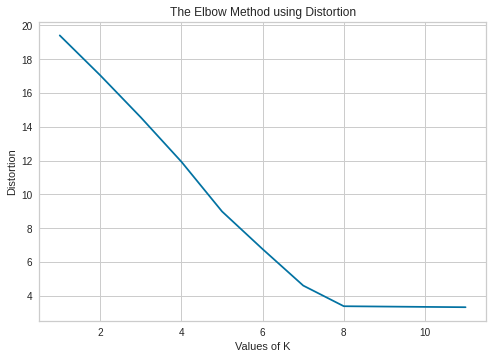

In [31]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


In [36]:
col=lambda l,i : l[i]
list_colors= ['red','magenta','green','blue','black','purple','brown','orange']


In [34]:
classifier=KMeans(n_clusters=8).fit(data)

In [37]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
i=0
for lat, lng, borough, neighborhood in zip(dfc['Latitude'], dfc['Longitude'], dfc['Borough'], dfc['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        data[i],
        radius=5,
        popup=label,
        color=col(list_colors,classifier.labels_[i]),
        fill=True,
        fill_color=col(list_colors,classifier.labels_[i]),
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    i=i+1
    
map_toronto

##Results
The optimum number of clusters found was 8 according to the elbow method hinting existence of 8 such clusters of 5G spectrum that can be set up to cover maximum neighbourhoods.